<img src="./../img/bndes-logo.png" alt="BNDES" width="600"/>

<div id="header">
<center/><h1 class="title"> Prêmio Dados Abertos para o Desenvolvimento - BNDES <br/><br/> E se o BNDES fosse um país?</h1>
<h2 class="author">Time 15</h2>
<h3 class="date">Agosto de 2021</h3>
</div>
<hr />
<p><br />
<span> <strong></strong></span><br />
</p>
<hr />
<p><br />
</p>
<p><em>Autores:</em><br />
Caue Caviglioni<br />
Marcello Campanelli<br />
Pedro Xavier<br />
Rafael Ribeiro<br />
Ronald Albert<br />
</p>

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import numpy as np
import zipfile
import plotly.graph_objects as go
import datetime
from sklearn.cluster import KMeans

<p><br />
</p>
<h1 id="introdução"> Introdução </h1>
<p>Com o avanço das tecnologias e a inserção do computador tanto no ambiente corporativo quanto no da população em geral, surgiu a possibilidade de se trabalhar com dados de maneira muito mais rápida e eficiente. Catalogar, processar e visualizar os dados deixaram de ser processos manuais e passaram a ser auxiliados por essas máquinas que revolucionaram o mundo.</p>
<p>Atualmente, o cada vez maior número de <em>data lakes</em> torna evidente a tendência de empresas e órgãos públicos a tornarem seus dados acessíveis ao público geral. Dessa forma, observamos a crescente valorização dos dados abertos e de instituições mais transparentes.</p>
<p>Aderindo a essa tendência, o Banco Nacional de Desenvolvimento Econômico e Social (<em>BNDES</em>) lançou seu <a href="https://www.bndes.gov.br/wps/portal/site/home/acesso-a-informacao/acesso-a-informacao-dados-abertos/!ut/p/z1/tVRNd6IwFN37K7phiUkkKJ0dIgUVba1fyMYTMGrmKKEh1XZ-_QSGzrSOtWdOOyx48Li5792bPEBUu7qq1UCognqobi8RRCk5sA2RjKdkB0KwiJrL4Lrv-vgWBt49RNA2-zf2rNM37IEJ5iUAvnPZEETqc2vkOb6NUWBNfAeOnJ56aXnI6yIwAxGIklRmcgsWcbqi-ZKluWTyMSk70OCW76kGSULznOtEZ-maiz1JCD-b1FdkxXOdxFRInhfkWcJWYNE0rDUyE6SvEFrrODGwHtMW0hutBGLcpDElsBJzQW10WWuvdPGPmYWdl-WH1YoK_juABfv-8BDZyhueSvokQdgedtzxsvvWHL80ZyJImmdE0DRhRIMsZSpKdiC5BjNB9-zUlnlhzGup0Li7gbYfoCketGGjj08Bt13DVQAnMLHbR961UQEuuLFQbrZeuXk3VCXMURt6LkbYx2B-YPQIpmmxdTsw_sfN8j-qMPpshVP6WbsD7aA7DrwpNCy38cX0J903_y-9-Un63tvz8feshGfO8NcPuKrSEANnsFHNE7ktgSD8eJ1qf7Pj8a9fnJ3GhqUYBF1TQUX9Uaj0Vsos_6ZBDR6Px3rZeX3DD_VYqExWTBYXsug_Z5K-qJDvTuK5OlueK1NO6UG2n-4t41mP4ua9_6M91D0nto6T9b4Kc0taz8Zu8xOEgb8o/dz/d5/L2dBISEvZ0FBIS9nQSEh/"><em>Plano de Dados Abertos</em></a>, com o objetivo de promover ganhos à administração pública. Motivados por isso, trazemos neste documento análises contendo diversos dados abertos, não sendo esses restritos ao <em>BNDES</em>.</p>
<h2 id="subsec:proposta">Proposta de Análise</h2>
<p>Avaliar a distribuição dos desembolsos do <em>BNDES</em> e comparar com diversos países, fazendo uso do crescimento percentual do <em>PIB</em> como parâmetro de sucesso econômico. Ao longo deste documento, vamos criar métricas de comparação a fim de traçar análises entre o <em>BNDES</em> e esses países referência, levantando questionamentos e insights.</p>
<p>Os países serão escolhidos com base em sua relevância econômica, bem como pela similaridade entre o <em>BNDES</em> e os países em questão. Essa similaridade será tratada utilizando algoritmos de clusterização, já que seria ineficiente e raso analisar os países de forma apenas manual.</p>
<h2 id="base-desembolsos-mensais-do-bndes">Base Desembolsos Mensais do BNDES</h2>
<p>Com a proposta acima, a base mais adequada a ser utilizada foi a de Desembolsos Mensais, que detalha os investimentos mensais do Sistema <em>BNDES</em>, por setores e por data, tendo uma cobertura temporal de 1995 até os meses atuais.</p>
<p>Essa base foi especialmente boa, pois foi possível comparar os desembolsos do <em>BNDES</em> com os investimentos de outros países, isso permitiu que o <em>BNDES</em> fosse tratado analogamente como um país.</p>


- [Base BNDES (Desembolsos)](https://dadosabertos.bndes.gov.br/dataset/desembolsos-mensais/resource/aac5c7bd-5d18-41c3-9720-52d20470427e) (Carregada por meio da API do portal de dados abertos do BNDES)


In [2]:
url_desembolsos = "https://dadosabertos.bndes.gov.br/dataset/c529f6a7-5ce4-4378-a585-92cbf53af710/resource/aac5c7bd-5d18-41c3-9720-52d20470427e/download/desembolsos-mensais.csv"

df_desembolsos = pd.read_csv(url_desembolsos, sep=';',decimal=",")

In [3]:
df_desembolsos.head(15)

,ano,mes,forma_de_apoio,produto,instrumento_financeiro,inovacao,porte_de_empresa,regiao,uf,municipio,municipio_codigo,setor_cnae,subsetor_cnae_agrupado,setor_bndes,subsetor_bndes,desembolsos_reais
0,2010,9,DIRETA,BNDES MERCADO DE CAPITAIS,MERCADO DE CAPITAIS,NÃO,GRANDE,SUDESTE,RIO DE JANEIRO,RIO DE JANEIRO,3304557,INDÚSTRIA DE TRANSFORMAÇÃO,"COQUE, PETRÓLEO E COMBUSTÍVEL",INDUSTRIA,QUÍMICA E PETROQUÍMICA,2.475354e+10
1,2009,7,DIRETA,BNDES FINEM,PROGRAMA PETROBRAS,NÃO,GRANDE,NORDESTE,PERNAMBUCO,IPOJUCA,2607208,INDÚSTRIA DE TRANSFORMAÇÃO,"COQUE, PETRÓLEO E COMBUSTÍVEL",INDUSTRIA,QUÍMICA E PETROQUÍMICA,9.889998e+09
2,2009,7,DIRETA,BNDES FINEM,PROGRAMA PETROBRAS,NÃO,GRANDE,SUDESTE,RIO DE JANEIRO,DIVERSOS,9999998,INDÚSTRIA DE TRANSFORMAÇÃO,"COQUE, PETRÓLEO E COMBUSTÍVEL",INDUSTRIA,QUÍMICA E PETROQUÍMICA,9.409998e+09
3,2012,12,DIRETA,BNDES FINEM,PROINVESTE,NÃO,GRANDE,CENTRO OESTE,DISTRITO FEDERAL,DIVERSOS,9999998,COMÉRCIO E SERVIÇOS,ADMINISTRAÇÃO PÚBLICA,COMÉRCIO E SERVIÇOS,COMÉRCIO E SERVIÇOS,7.271079e+09
4,2009,7,DIRETA,BNDES FINEM,PROGRAMA PETROBRAS,NÃO,GRANDE,SUDESTE,RIO DE JANEIRO,DIVERSOS,9999998,COMÉRCIO E SERVIÇOS,TRANSPORTE TERRESTRE,INFRAESTRUTURA,OUTROS TRANSPORTES,5.699997e+09
5,2012,7,DIRETA,BNDES FINEM,PETROLEO E GÁS NATURAL - Exploração,NÃO,GRANDE,SUDESTE,RIO DE JANEIRO,RIO DE JANEIRO,3304557,INDÚSTRIA DE TRANSFORMAÇÃO,"COQUE, PETRÓLEO E COMBUSTÍVEL",INDUSTRIA,QUÍMICA E PETROQUÍMICA,3.127362e+09
6,2020,12,DIRETA,BNDES-EXIM,BNDES EXIM PÓS-EMBARQUE – Buyer’s Credit,NÃO,GRANDE,SUDESTE,SAO PAULO,SAO JOSE DOS CAMPOS,3549904,INDÚSTRIA DE TRANSFORMAÇÃO,OUTROS EQUIP TRANSPORTE,INDUSTRIA,MATERIAL DE TRANSPORTE,2.505344e+09
7,2009,12,DIRETA,BNDES MERCADO DE CAPITAIS,MERCADO DE CAPITAIS,NÃO,GRANDE,SUDESTE,SAO PAULO,DIVERSOS,9999998,INDÚSTRIA DE TRANSFORMAÇÃO,PRODUTOS ALIMENTÍCIOS,INDUSTRIA,ALIMENTO E BEBIDA,2.265280e+09
8,2005,11,DIRETA,BNDES-EXIM,BNDES EXIM PÓS-EMBARQUE – Supplier’s Credit,NÃO,GRANDE,SUDESTE,SAO PAULO,DIVERSOS,9999998,INDÚSTRIA DE TRANSFORMAÇÃO,OUTROS EQUIP TRANSPORTE,INDUSTRIA,MATERIAL DE TRANSPORTE,2.060682e+09
9,2020,7,DIRETA,BNDES FINEM,CCEE COVID,NÃO,MÉDIA,SUDESTE,SAO PAULO,SAO PAULO,3550308,COMÉRCIO E SERVIÇOS,ELETRICIDADE E GÁS,INFRAESTRUTURA,ENERGIA ELÉTRICA,2.054185e+09


<p>Informações interativas e mais detalhadas sobre a base podem ser encontradas no <a href="https://www.bndes.gov.br/wps/portal/site/home/transparencia/estatisticas-desempenho/estatisticas-operacionais-sistema-bndes"><em>dashboards de desembolsos</em> </a> do <em>BNDES</em>.</p>

<h2 id="subsec:dre">Base DRE - Série Histórica</h2>

<p>A base de <code>DRE - Série Histórica</code> trata da demonstração de diversos resultados do <em>BNDES</em>, e servirá de apoio à já citada criação da métrica de comparação, presente na Seção proposta. Utilizaremos ela como um paralelo ao <em>PIB</em> dos países comparados, como um parâmetro de sucesso ou insucesso econômico da instituição.</p>

<H>Carregamento da base e leve tratamento dos dados:

In [4]:
url_balanco = "https://dadosabertos.bndes.gov.br/dataset/8d01af82-301b-4481-a2fc-3daf3a7bdf03/resource/159c6303-973d-413a-8de7-5343c318d37e/download/indicadores-financeiros-balanco-patrimonial-serie-historica.csv"
df_balanco = pd.read_csv(url_balanco, sep=';',decimal=",")
df_balanco['data'] = pd.to_datetime(df_balanco['data'])
df_balanco['ano'] = df_balanco.data.dt.year
df_balanco_interesse = df_balanco[["patrimonio_liquido", 'ano']].groupby('ano').mean()
pct_change = df_balanco_interesse.pct_change()
pct_change = pct_change * 100

<p>A base tem 77 registros e 35 colunas. As colunas de interesse da base são as de <code>data</code> e <code>patrimonio_liquido</code>, como mostradas na seção. A coluna referente ao patrimônio é tratada em milhões de reais.</p>

<h2 id="base-wdi">Base WDI</h2>
<p>Outra base que será usada é a base <code>WDI</code>, fornecida pelo The World Bank, essa que contém indicadores de diversas áreas relacionadas a gestão pública para inúmeros países.</p>
<p>A <code>WDI</code> é um <em>dataset</em> extremamente robusto. Para fins dessa análise, usaremos somente as colunas referentes a porcentagem de investimento em determinadas áreas e o crescimento anual do PIB de países.<br />
Abaixo, uma imagem da base com as colunas de porcentagem de investimento anual em químicos, indústria e crescimento anual do PIB</p>

- [Base WDI (Países)](https://datatopics.worldbank.org/world-development-indicators/) (Carregada localmente)

In [5]:
wdi_zip = zipfile.ZipFile('../data/WDI_csv.zip')
df_wdi = pd.read_csv(wdi_zip.open('WDIData.csv'))

In [6]:
df_wdi.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.320475,16.643243,16.994695,17.313168,17.604950,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,43.640661,NaN,NaN
2,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.525353,19.461383,17.790698,16.553470,23.907897,24.624725,26.813900,28.841150,NaN,NaN


<p>A base foi coletada do <a href="https://databank.worldbank.org/source/world-development-indicators"><em>website do The World Bank</em></a>.</p>

<h1 id="análise-exploratória-dos-dados">Análise exploratória dos dados</h1>

<h2 id="base-desembolsos-mensais-do-bndes-1">Base Desembolsos Mensais do BNDES</h2>
<p>A base em questão tem <span class="math inline">3244804</span> entradas e <span class="math inline">16</span> colunas a serem analisadas. A descrição detalhada de cada coluna dessa base, já apresentada por alto na Figura [fig:base_bndes], pode ser encontrada no <a href="https://dadosabertos.bndes.gov.br/dataset/c529f6a7-5ce4-4378-a585-92cbf53af710/resource/d4cc2eda-8743-46de-a813-f9f1da018c0f/download/dicionario-de-dados-desembolsos-mensais-do-sistema-bndes.pdf"><em>portal de dados abertos do BNDES</em></a>.</p>
<p>Para o fim de nossa análise, vamos focar em uma granularidade temporal anual e de setores de investimento com base na coluna <code>setor_bndes</code>. Essas escolhas foram feitas visando tornar todas as três bases compatíveis.</p>
<p>Abaixo vemos a quantidade de investimentos do BNDES por setor:</p>

<AxesSubplot:xlabel='ano'>

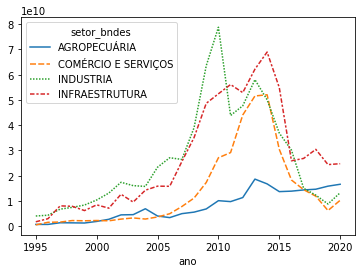

In [7]:
desembolsosBySetor = pd.DataFrame(df_desembolsos.groupby(by=["ano", "setor_bndes"]).sum().desembolsos_reais).unstack()
desembolsosBySetor.columns = desembolsosBySetor.columns.levels[1]

sns.lineplot(data=desembolsosBySetor)

<p>Podemos observar pela figura que houve um considerável crescimento do investimento do BNDES entre os anos de 2006 e 2017 nas áreas de Infraestrutura, Comércio e Serviços e Indústria, no entanto, tal comportamento não foi observado em na área de Agropecuária.</p>
<p>Para melhor observar essa relação de do investimento entre os setores, temos a figura abaixo, a qual nos mostra um gráfico de percentual investido em cada um dos setores anualmente.

<AxesSubplot:xlabel='ano'>

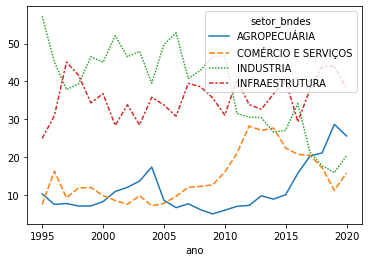

In [8]:
porcentoSetor = desembolsosBySetor.div(desembolsosBySetor.sum(axis=1), axis=0)
porcentoSetor = porcentoSetor.apply(lambda x: x*100)

sns.lineplot(data=porcentoSetor)

<p>A partir do gráfico de percentuais vemos que os investimentos do BNDES, tem uma histórica preferencia pelos setores de Indústria e Infraestrutura. É possível observar também que a Agropecuária vinha perdendo espaço para os outros dois setores entre 2006 e 2015, no entanto, recuperando espaço nos últimos anos, a partir de 2018.

<h2 id="base-wdi-1">Base WDI</h2>
<p>Essa base possui dados de de muitos países, com diversos indicadores e com uma cobertura temporal de 1960 até 2020, no momento. No total, possui <span class="math inline">383838</span> registros e <span class="math inline">66</span> colunas, que vamos tratar com agrupamentos e filtros para extrair novas bases a serem utilizadas para cruzar com dados da base <em>BNDES</em>. Mais detalhes sobre essa extensa base estão <a href="https://datatopics.worldbank.org/world-development-indicators/"><em>na página do The World Bank</em></a>.</p>
<h1 id="tratamento-dos-dados-e-criação-de-uma-base-agregada">Tratamento dos dados e criação de uma base agregada</h1>
<p>A fim de criarmos análises sólidas de maneira mais rápida e simples, optamos por criar uma base agregada com informações de interesse presentes nas três bases anteriormente citadas.</p>
<p>Vale mencionar que o alicerce desse cruzamento de informações entre as duas bases foi a relação encontrada no portal de dados abertos do <em>BNDES</em>, na base <code>Mapeamento de BNDES para CNAE</code>, bem como a comparação com o <a href="https://datatopics.worldbank.org/world-development-indicators/"><em>dicionário de indicadores da base WDI</em></a>.</p>

![fluxograma_mapeamento.png](..\img\fluxograma_mapeamento.png)

## Tratandos os dados dos desembolsos

In [9]:
df_desembolsos['date'] = pd.to_datetime(df_desembolsos['ano'].astype(str) + '-' + df_desembolsos['mes'].astype(str) + '-' + "01")
df_desembolsos.loc[:,['regiao', 'uf', 'municipio']] = df_desembolsos.loc[:,['regiao', 'uf', 'municipio']].replace('\s*$', '',regex=True)
df_desembolsos.sort_values(by=['date'], inplace=True)
df_desembolsos.head()

,ano,mes,forma_de_apoio,produto,instrumento_financeiro,inovacao,porte_de_empresa,regiao,uf,municipio,municipio_codigo,setor_cnae,subsetor_cnae_agrupado,setor_bndes,subsetor_bndes,desembolsos_reais,date
2560855,1995,1,INDIRETA,BNDES FINAME,NaN,NaN,GRANDE,SUDESTE,SAO PAULO,DIVERSOS,1302603,COMÉRCIO E SERVIÇOS,TRANSPORTE TERRESTRE,INFRAESTRUTURA,TRANSPORTE RODOVIÁRIO,13369.99,1995-01-01
3098546,1995,1,INDIRETA,BNDES FINAME,NaN,NaN,MICRO,SUDESTE,SAO PAULO,FLORA RICA,3515806,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,AGROPECUÁRIA,2940.00,1995-01-01
1750935,1995,1,INDIRETA,BNDES FINAME,NaN,NaN,MICRO,SUDESTE,SAO PAULO,SAO BERNARDO DO CAMPO,3548708,COMÉRCIO E SERVIÇOS,TRANSPORTE TERRESTRE,INFRAESTRUTURA,TRANSPORTE RODOVIÁRIO,54600.00,1995-01-01
1461956,1995,1,INDIRETA,BNDES FINAME,NaN,NaN,GRANDE,SUL,RIO GRANDE DO SUL,SAO SEPE,4319604,INDÚSTRIA DE TRANSFORMAÇÃO,PRODUTOS ALIMENTÍCIOS,INDUSTRIA,ALIMENTO E BEBIDA,84000.00,1995-01-01
2034091,1995,1,INDIRETA,BNDES FINAME,NaN,NaN,MICRO,SUL,SANTA CATARINA,DIVERSOS,5211800,INDÚSTRIA DE TRANSFORMAÇÃO,BORRACHA E PLÁSTICO,INDUSTRIA,OUTRAS,35119.99,1995-01-01


## Tratandos os dados da base WDI

In [10]:
wdi_t = df_wdi.T
idx = pd.IndexSlice

wdi_t.columns = pd.MultiIndex.from_product([wdi_t.loc['Country Name'].unique(), wdi_t.loc['Indicator Name'].unique()])
wdi_t.drop(labels=['Country Name','Indicator Name', 'Country Code'], axis=0, inplace=True)
wdi_t.drop(index=['Indicator Code','Unnamed: 65'], inplace=True)
wdi_t.index = list(wdi_t.index.str.extract(r'([0-9]{4})').values.astype(int).reshape((1,-1)))
wdi_t.index = [i[0] for i in wdi_t.index.to_flat_index()]
wdi_t.index = wdi_t.index.astype(int)
wdi_t.replace(regex=r'^.*$', value=np.nan, inplace=True)
wdi_t = wdi_t.apply(pd.to_numeric)
wdi_t.head()

Africa Eastern and Southern  \
     Access to clean fuels and technologies for cooking (% of population)   
1960                                                NaN                     
1961                                                NaN                     
1962                                                NaN                     
1963                                                NaN                     
1964                                                NaN                     

                                              \
     Access to electricity (% of population)   
1960                                     NaN   
1961                                     NaN   
1962                                     NaN   
1963                                     NaN   
1964                                     NaN   

                                                           \
     Access to electricity, rural (% of rural population)   
1960                                                NaN     
1961                                                NaN     
1962                                                NaN     
1963                                                NaN     
1964                                                NaN     

                                                           \
     Access to electricity, urban (% of urban population)   
1960                                                NaN     
1961                                                NaN     
1962                                                NaN     
1963                                                NaN     
1964                                                NaN     

                                                                                                                      \
     Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)   
1960                                                NaN                                                                
1961                                                NaN                                                                
1962                                                NaN                                                                
1963                                                NaN                                                                
1964                                                NaN                                                                

                                                                                                                              \
     Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)   
1960                                                NaN                                                                        
1961                                                NaN                                                                        
1962                                                NaN                                                                        
1963                                                NaN                                                                        
1964                                                NaN                                                                        

                                                                                                                            \
     Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)   
1960                                                NaN                                                                      
1961                                                NaN                                                                      
1962                                                NaN                

Vamos checar agora quais anos sao cobertos pelos dados do BNDES para filtrarmos a base WDI com dados de nosso interesse.

In [11]:
lista_anos_interesse = df_desembolsos['ano'].sort_values().unique().astype(str)

print(lista_anos_interesse)

['1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004'
 '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018' '2019' '2020']


Vemos que sao dados a partir de 1995 com termino em 2020. Com essas informacoes, vamos filtrar as colunas da base wdi. Vamos manter as colunas contendo o nome do pais, codigo do pais e nome do indicador (Country Name, Country Code, Indicator Name)

In [12]:
df_wdi[lista_anos_interesse]

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NaN,NaN,NaN,NaN,NaN,12.205985,12.549333,12.887705,13.226335,13.575592,...,15.981256,16.320475,16.643243,16.994695,17.313168,17.604950,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,20.086007,23.103178,24.223430,25.023184,26.176336,...,28.381836,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,43.640661,NaN
2,NaN,NaN,NaN,NaN,NaN,8.491610,13.201875,15.209347,13.813535,15.423615,...,15.295950,20.525353,19.461383,17.790698,16.553470,23.907897,24.624725,26.813900,28.841150,NaN
3,NaN,NaN,NaN,NaN,NaN,56.083452,54.770123,56.102330,57.094310,57.836866,...,65.470615,66.303599,66.496010,65.828988,66.926692,68.722184,71.085418,71.994933,73.589886,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383833,NaN,NaN,NaN,NaN,22.3,NaN,NaN,NaN,NaN,NaN,...,16.900000,NaN,NaN,NaN,14.500000,NaN,NaN,NaN,NaN,NaN
383834,NaN,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN,...,3.900000,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,5.400000,NaN
383835,NaN,NaN,NaN,NaN,28.7,NaN,NaN,NaN,NaN,NaN,...,30.500000,NaN,NaN,33.500000,32.400000,NaN,NaN,NaN,33.700000,NaN
383836,51.6,52.3,52.9,53.5,54.0,54.600000,55.200000,55.700000,56.200000,56.600000,...,59.000000,59.200000,59.300000,59.400000,59.400000,59.500000,59.500000,59.600000,59.600000,NaN


Usamos o seguinte dicionário, para estabelecer a relação entre a base WDI e a base dos desembolsos do BNDES

In [13]:
relacao_01 = {"quimica" : ["QUÍMICA E PETROQUÍMICA", "Chemicals (% of value added in manufacturing)"], 
              "agropecuaria": ["AGROPECUÁRIA", "Agriculture, forestry, and fishing, value added (% of GDP)"], 
              "industria": ["INDUSTRIA", "Industry (including construction), value added (% of GDP)"],
              "servicos":["COMÉRCIO E SERVIÇOS", "Services, value added (% of GDP)"] }


De posse do mapeamento entre os indicadores do *BNDES* e do WDI, chegamos à base agregada. Além disso, é importante ressaltar que, para que as análises fossem feitas em mesma escala, utilizamos o crescimento percentual do ano com seu antecessor como valor padrão para os indicadores tanto do *BNDES* quanto para o WDI.  

![corr.svg](..\img\corr.svg)

Acima, podemos ver a matriz de correlação para o investimento em algumas áreas do BNDES e o crescimento do PIB Brasileiro.<br>
Vemos que o único setor de investimento que possui uma correlação positiva com o PIB Brasileiro é o investimento em Indústria.

# Investimentos por setores de países e BNDES

Com dados sobre gastos em determinados setores presentes na base agregada, tanto do <i>BNDES</i> quanto o de outros países desenvolvidos, selecionamos três setores para comparação entre o <i>BNDES</i> e esses outros países: Indústria, agropecuária e serviços. <br><br>
    Esses setores e o de infraestrutura eram os mais relevantes, por isso escolhemos esses para análise. É importante mencionar que o setor de infraestrutura não foi utilizado, pois o mapeamento entre os subsetores de Infraestrutura da base do <i>BNDES</i> e da base <i>WDI</i> se tornou inviável, já que a relação entre a base do <i>BNDES</i> e do WDI não tinham uma correspondência clara.

Escolhemos alguns dos países mais desenvolvidos tecnologicamente para checar como o *BNDES* se comportou em relação a seus investimentos, se manteve uma postura parecida ou destoou no que os países mais desenvolvidos focaram.
<br><br> Os países escolhidos para efeitos de comparação do *BNDES*, foram o Brasil, China, Estados Unidos e Alemanha.  


In [14]:
paises_interesse_p = ['Brazil', 'China', 'United States', 'Germany', 'BNDES']

Também escolhemos países relevantes mais relevantes no cenário internacional para checar similaridades com o *BNDES* usando Clusterização, para isso, foram selecionados 12 países: Brasil, Estados Unidos, China, Alemanha, Reino Unido, Japão, Itália, França, Canada, Australia, Argentina e Uruguai.

In [15]:
paises_interesse = ['Brazil', 'United States', 'China', 'Germany', 'United Kingdom', 'Japan', 'Italy', 'France', 'Canada', 'Australia', 'BNDES', 'Argentina', 'Uruguay']

Abaixo podemos ver uma matriz de correlação das % de investimentos em alguns setores econômicos, com o crescimento do PIB brasileiro

<AxesSubplot:xlabel='None-None', ylabel='None-None'>

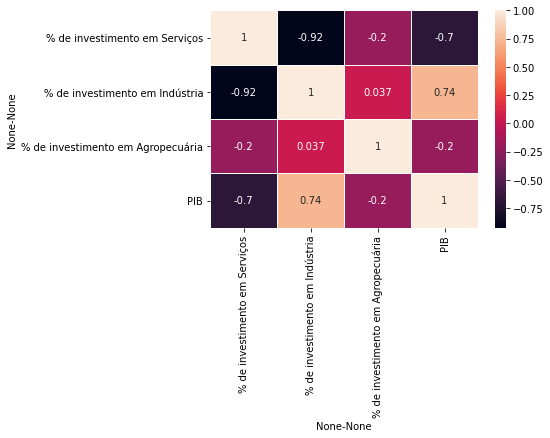

In [16]:
countries = ['Brazil']

sns.heatmap(
    wdi_t.loc[lista_anos_interesse.astype(int),idx[countries,[relacao_01['servicos'][1]] + [relacao_01['industria'][1]] + [relacao_01['agropecuaria'][1]] + ['GDP growth (annual %)']]].corr(),
    annot=True,
    linewidths=.5,
    xticklabels=['% de investimento em Serviços', '% de investimento em Indústria', '% de investimento em Agropecuária', 'PIB'], 
    yticklabels=['% de investimento em Serviços', '% de investimento em Indústria', '% de investimento em Agropecuária', 'PIB']
)

## Setor - Indústria

In [17]:
setor = "industria"

aux_wdi = wdi_t[4:].loc[:,pd.IndexSlice[:, relacao_01[setor][1]]]
aux_wdi = aux_wdi.droplevel(1, axis=1)
aux_wdi = aux_wdi.fillna(0)
aux_wdi = aux_wdi.apply(lambda x: x.replace(0, x.iloc[np.array(x).nonzero()].mean()) if len(np.array(x).nonzero()[0]) > 0 else x
                        , axis=0)
aux_wdi = aux_wdi.loc[lista_anos_interesse.astype(int)]

concat = pd.concat([aux_wdi, pd.DataFrame({'BNDES': porcentoSetor[relacao_01[setor][0]]})], axis=1)
concat.head()

,Africa Eastern and Southern,Africa Western and Central,Arab World,Caribbean small states,Central Europe and the Baltics,Early-demographic dividend,East Asia & Pacific,East Asia & Pacific (excluding high income),East Asia & Pacific (IDA & IBRD countries),Euro area,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe,BNDES
1995,28.814826,31.805911,41.271846,29.988476,31.562110,32.582733,38.758064,44.861795,44.861795,26.477646,...,24.143450,11.479984,37.651155,28.755920,0.0,29.523577,30.570263,34.313514,25.700235,57.225905
1996,30.166296,32.514328,42.379189,29.494575,31.259934,33.307786,38.891353,45.352700,45.352700,25.922601,...,26.083207,9.934932,44.758706,29.729889,0.0,26.589629,40.251622,33.201999,23.002386,45.211221
1997,28.776579,31.650779,43.287880,28.299864,31.124905,33.122533,38.742135,45.468943,45.468943,25.697080,...,22.873376,8.507878,46.353589,32.075135,0.0,23.229959,41.877339,32.380638,22.533652,37.862173
1998,27.989061,27.208882,39.045991,25.958005,30.387059,31.915420,38.124512,44.562960,44.562960,25.565316,...,22.400000,8.174126,40.574084,32.491268,0.0,22.980481,32.047505,27.277391,20.806155,39.393530
1999,29.512679,28.202615,42.344538,26.599435,29.525215,32.251521,37.617691,44.144658,44.144658,25.139848,...,21.046104,8.322493,41.940662,34.494752,0.0,24.744802,40.607058,22.819842,19.116417,46.504061


<AxesSubplot:>

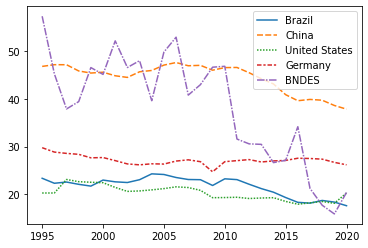

In [18]:
sns.lineplot(data=concat.loc[lista_anos_interesse.astype(int), paises_interesse_p])

Analisando o gráfico acima, vemos que os países mais desenvolvidos investem boa parte no setor da indústria, enquanto o *BNDES* se mantém muito abaixo de todos em relação aos mesmos desembolsos.

<br> Com a clusterização, vamos comparar o *BNDES* com países relevantes no contexto internacional para checar com quais o *BNDES* vai se assimilar no setor de indústria.

In [19]:
concat = concat[paises_interesse]

C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMe

C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMe

C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMe

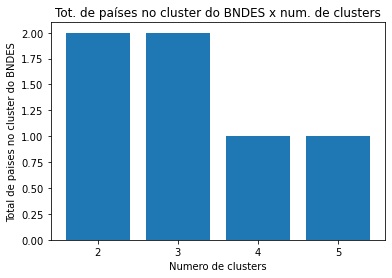

In [20]:
#ANALISE DO NUMERO DE CLUSTER
def cidade_grupo(nclusters, pais='BNDES'):
    pais_index = list(concat.columns).index(pais) 
    lista_paises = list()
    
    for _ in range(20):
        clustering = KMeans(n_clusters=nclusters,algorithm='full').fit(concat.values.T)
        lista_paises += (list(concat.columns[np.where(clustering.labels_ == clustering.labels_[pais_index])[0]]))
        
    return set(lista_paises)

paises_similares_dict = {} 
ncls = []
n_clusters = np.array(range(2,6))
for k in n_clusters:
    listpaises = cidade_grupo(k)
    paises_similares_dict[str(k)] = list(listpaises)
    ncls.append(len(listpaises))
    
plt.bar(range(len(ncls)),ncls)
plt.xticks(range(len(n_clusters)), range(n_clusters.min(),n_clusters.max() + 1))
plt.title('Tot. de países no cluster do BNDES x num. de clusters')
plt.xlabel('Numero de clusters')
plt.ylabel('Total de paises no cluster do BNDES')
plt.savefig('../img/n_clusters_'+setor+'.svg')
plt.show()

Vemos que o *BNDES* se agrupa no máximo com 1 país, ao ser clusterizado com 2 clusters. 

<br> Dentre os 12, os países que se agruparam com o *BNDES* nesse setor foram , segundo o gráfico:

<AxesSubplot:>

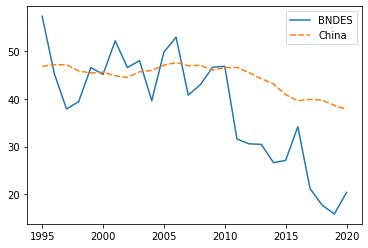

In [21]:
countries = np.array(paises_similares_dict['2'])

sns.lineplot(data = concat[countries])

Nessa clusterização, o *BNDES* se agrupou com a China.

## Setor - Agropecuária

In [22]:
setor = "agropecuaria"

aux_wdi = wdi_t[4:].loc[:,pd.IndexSlice[:, relacao_01[setor][1]]]
aux_wdi = aux_wdi.droplevel(1, axis=1)
aux_wdi = aux_wdi.fillna(0)
aux_wdi = aux_wdi.apply(lambda x: x.replace(0, x.iloc[np.array(x).nonzero()].mean()) if len(np.array(x).nonzero()[0]) > 0 else x
                        , axis=0)
aux_wdi = aux_wdi.loc[lista_anos_interesse.astype(int)]

concat = pd.concat([aux_wdi, pd.DataFrame({'BNDES': porcentoSetor[relacao_01[setor][0]]})], axis=1)
concat.head()

,Africa Eastern and Southern,Africa Western and Central,Arab World,Caribbean small states,Central Europe and the Baltics,Early-demographic dividend,East Asia & Pacific,East Asia & Pacific (excluding high income),East Asia & Pacific (IDA & IBRD countries),Euro area,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe,BNDES
1995,16.748452,25.945604,9.633462,6.661711,7.150891,14.216575,10.197335,19.010348,19.010348,2.558190,...,28.049922,15.425893,5.040472,27.182689,0.0,11.819179,20.533833,14.089372,13.465969,10.301261
1996,16.698146,26.465267,9.898727,6.346075,6.920040,14.235251,10.038509,18.685541,18.685541,2.555631,...,22.364756,16.510274,4.089619,27.758826,0.0,13.016190,16.728127,13.298245,19.342623,7.540707
1997,17.382682,26.887818,8.778614,5.786048,6.823148,13.619183,9.330466,17.409319,17.409319,2.470384,...,28.198612,15.709043,4.495492,25.771707,0.0,11.418161,16.191402,13.982548,16.695731,7.772736
1998,16.755085,27.357228,9.505661,5.206697,5.831943,13.570836,9.113944,16.956718,16.956718,2.358719,...,26.800000,26.098006,4.950432,25.780780,0.0,11.713949,19.563414,15.868411,18.890320,7.101208
1999,15.572062,25.776609,8.877752,5.126221,5.132808,12.823804,8.706589,16.093478,16.093478,2.222392,...,29.022953,24.846067,4.351061,25.434438,0.0,10.650403,16.434829,18.189972,15.481267,7.127420


<AxesSubplot:>

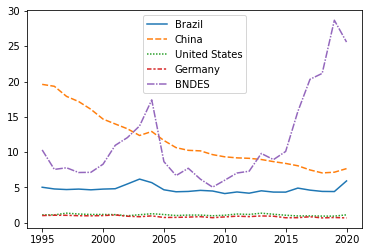

In [23]:
sns.lineplot(data=concat.loc[lista_anos_interesse.astype(int), paises_interesse_p])

<p>Com esse gráfico relativo ao investimento percentual no setor de agropecuária, vemos que a tendência dos países mais desenvolvidos se manteve relativamente estável, ou desceu ao longo dos anos. O <em>BNDES</em> não acompanhou tão bem os países mais desenvolvidos, investindo muito em agropecuária. Porém, no gráfico é possível perceber a relevância do <em>BNDES</em> para o Brasil, já que quando há uma subida súbita no gráfico do <em>BNDES</em>, o percentual investido do Brasil também sobe.</p>

<p>Na Figura abaixo, vemos que a correlação dos desembolsos e a agropecuária é negativo <span class="math inline">( − 0.37)</span>, o que é considerado uma correlação fraca. Isso significa que, para o período analisado, o aumento nos investimentos por parte do <em>BNDES</em> no setor de agropecuária esteve relacionado a um decrescimento do PIB.</p>
<p>Vale notar que, pelo PIB ser composto por muitos outros fatores além dos resultados financeiros advindos da agropecuária, essa análise não pode ser generalizada. Em outras palavras, o aumento no investimento da agropecuária não necessariamente acarreta uma diminuição do PIB.</p>


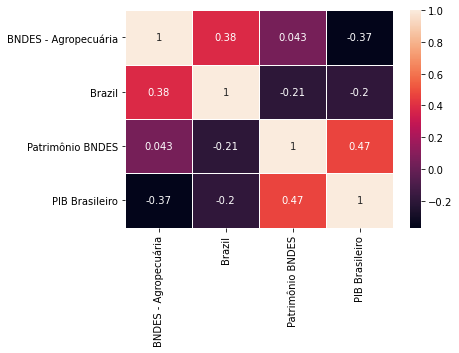

In [24]:
paises = ['Brazil', 'Patrimônio BNDES', 'PIB Brasileiro']

concat_gdp = pd.concat([concat, pct_change, wdi_t.loc[lista_anos_interesse.astype(int),idx[['Brazil'], ['GDP growth (annual %)']]]], axis=1)
col = list(concat_gdp.columns[:-1])
col.append('PIB Brasileiro')
concat_gdp.columns = col
concat_gdp.rename(columns = {'patrimonio_liquido': 'Patrimônio BNDES'}, inplace = True)

corr_df = concat_gdp.loc[lista_anos_interesse.astype(int), paises]
corr_df = pd.concat([corr_df, pd.DataFrame({'BNDES - Agropecuária': porcentoSetor['AGROPECUÁRIA']})], axis=1)
corr_df = corr_df[['BNDES - Agropecuária', 'Brazil','Patrimônio BNDES', 'PIB Brasileiro']]
sns.heatmap(corr_df.corr(),
    annot=True,
    linewidths=.5)

plt.savefig('../img/corr.svg')

<p>Selecionamos alguns países relevantes no contexto internacional para clusterizar junto com o <em>BNDES</em>.<br> O resultado está na Figura :</p>

In [25]:
concat = concat[paises_interesse]

C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMe

C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMe

C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMe

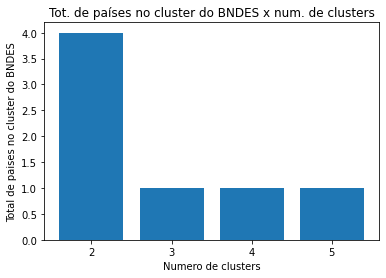

In [26]:
#ANALISE DO NUMERO DE CLUSTER
def cidade_grupo(nclusters, pais='BNDES'):
    pais_index = list(concat.columns).index(pais) 
    lista_paises = list()
    
    for _ in range(20):
        clustering = KMeans(n_clusters=nclusters,algorithm='full').fit(concat.values.T)
        lista_paises += (list(concat.columns[np.where(clustering.labels_ == clustering.labels_[pais_index])[0]]))
        
    return set(lista_paises)

paises_similares_dict = {} 
ncls = []
n_clusters = np.array(range(2,6))
for k in n_clusters:
    listpaises = cidade_grupo(k)
    paises_similares_dict[str(k)] = list(listpaises)
    ncls.append(len(listpaises))
    
plt.bar(range(len(ncls)),ncls)
plt.xticks(range(len(n_clusters)), range(n_clusters.min(),n_clusters.max() + 1))
plt.title('Tot. de países no cluster do BNDES x num. de clusters')
plt.xlabel('Numero de clusters')
plt.ylabel('Total de paises no cluster do BNDES')
plt.savefig('../img/n_clusters_'+setor+'.svg')
plt.show()

<p>Com 2 Clusters, o <em>BNDES</em> se agrupou com 3 outros países, com mais que 2, o <em>BNDES</em> não conseguiu se assimilar a nenhum país.</p>
<p>Os países que se agruparam com o <em>BNDES</em> nesse setor foram:</p>
<p>O <em>BNDES</em> se assimila à China, Argentina e ao Uruguai.</p>

<AxesSubplot:>

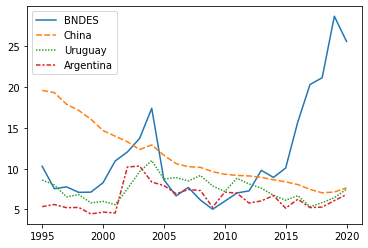

In [27]:
countries = np.array(paises_similares_dict['2'])

sns.lineplot(data = concat[countries])

## Setor - Serviços

In [28]:
setor = "servicos"

aux_wdi = wdi_t[4:].loc[:,pd.IndexSlice[:, relacao_01[setor][1]]]
aux_wdi = aux_wdi.droplevel(1, axis=1)
aux_wdi = aux_wdi.fillna(0)
aux_wdi = aux_wdi.apply(lambda x: x.replace(0, x.iloc[np.array(x).nonzero()].mean()) if len(np.array(x).nonzero()[0]) > 0 else x
                        , axis=0)
aux_wdi = aux_wdi.loc[lista_anos_interesse.astype(int)]

concat = pd.concat([aux_wdi, pd.DataFrame({'BNDES': porcentoSetor[relacao_01[setor][0]]})], axis=1)
concat.head()

,Africa Eastern and Southern,Africa Western and Central,Arab World,Caribbean small states,Central Europe and the Baltics,Early-demographic dividend,East Asia & Pacific,East Asia & Pacific (excluding high income),East Asia & Pacific (IDA & IBRD countries),Euro area,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe,BNDES
1995,47.510431,39.684606,45.103345,55.103523,50.159671,48.017739,49.408298,36.183461,36.183461,61.340107,...,34.662914,0.0,48.530041,44.061391,0.0,52.220665,36.208447,39.652509,49.221056,7.504293
1996,46.370287,38.188005,44.146836,56.183214,50.809029,47.365823,49.489824,36.044055,36.044055,61.760932,...,37.124261,0.0,42.219353,42.511285,0.0,51.510441,31.462503,41.543524,46.500371,16.312665
1997,46.923119,38.621238,44.424276,59.360743,51.062017,48.144177,50.520734,37.251033,37.251033,61.937938,...,36.548007,0.0,40.344346,42.153158,0.0,54.800787,31.055397,41.471849,48.948805,9.263551
1998,48.220805,42.597740,48.132193,60.977024,52.418782,49.035271,51.566202,38.658973,38.658973,62.042394,...,36.400000,0.0,45.809184,41.727952,0.0,54.442205,37.083977,44.845831,47.001984,11.914548
1999,47.597694,42.796456,45.232261,61.422281,53.573483,49.359348,52.483401,39.910925,39.910925,62.302556,...,36.504656,0.0,45.778310,40.070810,0.0,53.305863,33.400647,47.502515,46.131977,11.993189


<AxesSubplot:>

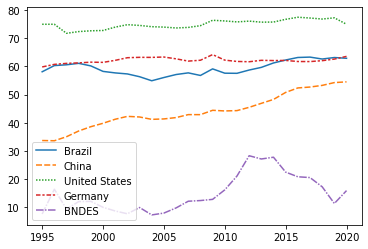

In [29]:
sns.lineplot(data=concat.loc[lista_anos_interesse.astype(int), paises_interesse_p])

No setor de serviços, os países mais desenvolvidos se mantiveram estáveis, com exceção da China, que veio se desenvolvendo e incrementando os investimentos em serviços. O *BNDES* teve um comportamento interessante, e de certa forma acompanhou o crescimento dos investimentos da China no determinado setor, o que é otimista, pois a China é o país que mais cresce tecnologicamente e economicamente nos tempos atuais.
 

Nas células abaixo, vamos clusterizar com os países de interesse para ver com quais o \textit{BNDES} se agrupa.

In [30]:
concat = concat[paises_interesse]

C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMe

C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMe

C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rafael\anaconda3\envs\bndes\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMe

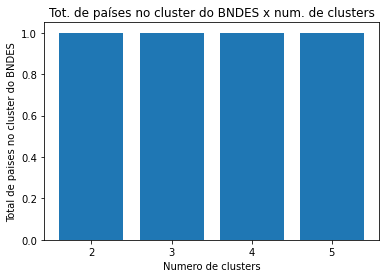

In [31]:
#ANALISE DO NUMERO DE CLUSTER
def cidade_grupo(nclusters, pais='BNDES'):
    pais_index = list(concat.columns).index(pais) 
    lista_paises = list()
    
    for _ in range(20):
        clustering = KMeans(n_clusters=nclusters,algorithm='full').fit(concat.values.T)
        lista_paises += (list(concat.columns[np.where(clustering.labels_ == clustering.labels_[pais_index])[0]]))
        
    return set(lista_paises)

paises_similares_dict = {} 
ncls = []
n_clusters = np.array(range(2,6))
for k in n_clusters:
    listpaises = cidade_grupo(k)
    paises_similares_dict[str(k)] = list(listpaises)
    ncls.append(len(listpaises))
    
plt.bar(range(len(ncls)),ncls)
plt.xticks(range(len(n_clusters)), range(n_clusters.min(),n_clusters.max() + 1))
plt.title('Tot. de países no cluster do BNDES x num. de clusters')
plt.xlabel('Numero de clusters')
plt.ylabel('Total de paises no cluster do BNDES')
plt.savefig('../img/n_clusters_'+setor+'.svg')
plt.show()

Nessa clusterização sobre o setor de serviços ele ficou sozinho no agrupamento. <br>
Como vemos na imagem abaixo:

<AxesSubplot:>

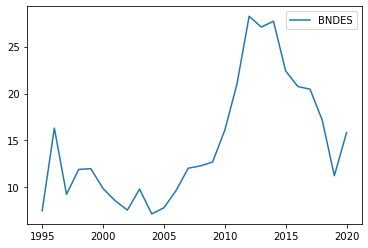

In [32]:
countries = np.array(paises_similares_dict['2'])

sns.lineplot(data = concat[countries])